In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/zhr47/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import time

/Users/zhr47/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/zhr47/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/zhr47/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/zhr47/opt/anaconda3/e

In [4]:
# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [5]:
df = pd.read_csv("data/simple_data_for_ML.csv")
df

,Unnamed: 0,id,host_is_superhost,host_identity_verified,bedrooms,beds,accommodates,number_of_reviews,review_scores_rating,reviews_per_month,amenities_count,host_listings_count,instant_bookable,reviews_per_month.1,price
0,0,2818,1,1,1.0,2.0,2,278,98.0,1.98,25,1.0,1,1.98,$59.00
1,1,20168,0,1,1.0,1.0,2,340,89.0,2.63,16,2.0,1,2.63,$236.00
2,2,25428,1,0,1.0,1.0,3,5,100.0,0.15,28,2.0,0,0.15,$125.00
3,3,27886,1,1,1.0,1.0,2,219,99.0,2.05,23,1.0,1,2.05,$138.00
4,4,28871,1,1,1.0,1.0,2,336,97.0,2.72,14,2.0,0,2.72,$75.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,18777,45761390,0,1,1.0,2.0,4,0,0.0,0.00,8,892.0,1,0.00,$137.00
18778,18778,45763935,0,0,2.0,0.0,1,0,0.0,0.00,10,2.0,0,0.00,$120.00
18779,18779,45776325,0,0,1.0,1.0,2,0,0.0,0.00,19,3.0,0,0.00,$20.00
18780,18780,45777642,0,0,1.0,0.0,2,0,0.0,0.00,8,0.0,0,0.00,$33.00


In [6]:
df.price = df.price.str[1:-4]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')
df = df.loc[df.price < 1000]
df.head()

,Unnamed: 0,id,host_is_superhost,host_identity_verified,bedrooms,beds,accommodates,number_of_reviews,review_scores_rating,reviews_per_month,amenities_count,host_listings_count,instant_bookable,reviews_per_month.1,price
0,0,2818,1,1,1.0,2.0,2,278,98.0,1.98,25,1.0,1,1.98,59
1,1,20168,0,1,1.0,1.0,2,340,89.0,2.63,16,2.0,1,2.63,236
2,2,25428,1,0,1.0,1.0,3,5,100.0,0.15,28,2.0,0,0.15,125
3,3,27886,1,1,1.0,1.0,2,219,99.0,2.05,23,1.0,1,2.05,138
4,4,28871,1,1,1.0,1.0,2,336,97.0,2.72,14,2.0,0,2.72,75


In [7]:
#df.price = df.price.str.replace("$", "")
#df.price = df.price.str.replace(",", "")
#df.price = df.price.str.replace(".", "")
#df.price = df.price.astype('int64')

This section the first regression

In [8]:
#########################

In [9]:
X = df[['bedrooms','beds','accommodates']]
y = df['price'].astype(float).values.reshape(-1,1)
print (X.shape, y.shape)

(18744, 3) (18744, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)
training_score1 = model.score(X_train, y_train)
testing_score1 = model.score(X_test, y_test)

print(f"Frist Training Score: {training_score1}")
print(f"First Testing Score: {testing_score1}")

Frist Training Score: 0.25225396920863685
First Testing Score: 0.24152146140448316


Text(0.5, 1.0, 'First Residual Plot')

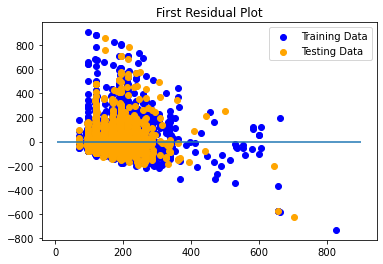

In [13]:
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=900)
plt.title("First Residual Plot")

In [14]:
#########################

The Second Regression

In [15]:
#########################

In [16]:
X = df[['bedrooms','beds','accommodates',
        'number_of_reviews']]
y = df['price'].astype(float).values.reshape(-1,1)
print (X.shape, y.shape)

(18744, 4) (18744, 1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [18]:
model.fit(X_train, y_train)
training_score2 = model.score(X_train, y_train)
testing_score2 = model.score(X_test, y_test)

print(f"Second Training Score: {training_score2}")
print(f"Second Testing Score: {testing_score2}")

Second Training Score: 0.25929790261217067
Second Testing Score: 0.24851900793858417


Text(0.5, 1.0, 'Second Residual Plot')

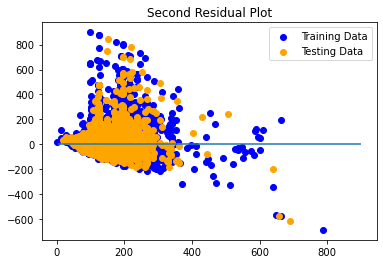

In [19]:
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=900)
plt.title("Second Residual Plot")

In [20]:
#########################

The Third Regression

In [21]:
#########################

In [22]:
X = df[['bedrooms','beds','accommodates',
        'number_of_reviews',
        'review_scores_rating',
        'host_is_superhost']]
y = df['price'].astype(float).values.reshape(-1,1)
print (X.shape, y.shape)

(18744, 6) (18744, 1)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [24]:
model.fit(X_train, y_train)
training_score3 = model.score(X_train, y_train)
testing_score3 = model.score(X_test, y_test)

print(f"Third Training Score: {training_score3}")
print(f"Third Testing Score: {testing_score3}")

Third Training Score: 0.25944069582421203
Third Testing Score: 0.24889446463840592


Text(0.5, 1.0, 'Third Residual Plot')

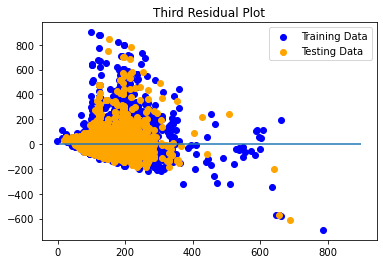

In [25]:
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=900)
plt.title("Third Residual Plot")

In [26]:
#########################

In [27]:
#########################

In [28]:
X = df[['bedrooms','beds','accommodates',
        'number_of_reviews',
        'review_scores_rating',
        'host_identity_verified',
        'host_is_superhost',
        'reviews_per_month',
        ]]
y = df['price'].astype(float).values.reshape(-1,1)
print (X.shape, y.shape)

(18744, 8) (18744, 1)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [30]:
model.fit(X_train, y_train)
training_score4 = model.score(X_train, y_train)
testing_score4 = model.score(X_test, y_test)

print(f"Fourth Training Score: {training_score4}")
print(f"Fourth Testing Score: {testing_score4}")

Fourth Training Score: 0.2635727610182592
Fourth Testing Score: 0.25478948905294574


Text(0.5, 1.0, 'Fourth Residual Plot')

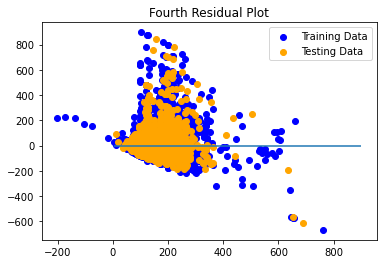

In [31]:
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=900)
plt.title("Fourth Residual Plot")

In [32]:
#########################

The Fifth Regression

In [33]:
#########################

In [34]:
X = df[['id','bedrooms','beds','accommodates',
        'number_of_reviews',
        'review_scores_rating',
        'host_identity_verified',
        'host_is_superhost',
        'reviews_per_month',
        'host_listings_count',
        'amenities_count',
        'instant_bookable',
        'reviews_per_month']]
y = df['price'].astype(float).values.reshape(-1,1)
print (X.shape, y.shape)

(18744, 13) (18744, 1)


In [35]:
from sklearn.model_selection import train_test_split
X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(X,y, random_state = 42)

In [36]:
X_train = X_train_og.drop("id", axis=1)
X_test = X_test_og.drop("id", axis=1) 
#y_train = y_train_og.drop("id", axis=1)
#y_test = y_test_og.drop("id", axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [38]:
model.fit(X_train, y_train)
training_score5 = model.score(X_train, y_train)
testing_score5 = model.score(X_test, y_test)

print(f"Fifth Training Score: {training_score5}")
print(f"Fifth Testing Score: {testing_score5}")

Fifth Training Score: 0.2840431285146513
Fifth Testing Score: 0.27016266005694023


In [39]:
y_test_array = np.array(list(y_test))
val_preds_hpm_reg_array = np.array(model.predict(X_test))

Predicted_df_test = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': val_preds_hpm_reg_array.flatten()})


In [40]:
y_test_array = np.array(list(y_train))
val_preds_hpm_reg_array = np.array(model.predict(X_train))

Predicted_df_train = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': val_preds_hpm_reg_array.flatten()})

Text(0.5, 1.0, 'Fifth Residual Plot')

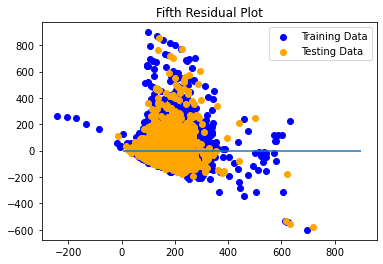

In [41]:
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=900)
plt.title("Fifth Residual Plot")

In [42]:
#########################

In [43]:
print(f"Frist Training Score: {training_score1}")
print(f"First Testing Score: {testing_score1}")

Frist Training Score: 0.25225396920863685
First Testing Score: 0.24152146140448316


In [44]:
print(f"Second Training Score: {training_score2}")
print(f"Second Testing Score: {testing_score2}")

Second Training Score: 0.25929790261217067
Second Testing Score: 0.24851900793858417


In [45]:
print(f"Third Training Score: {training_score3}")
print(f"Third Testing Score: {testing_score3}")

Third Training Score: 0.25944069582421203
Third Testing Score: 0.24889446463840592


In [46]:
print(f"Fourth Training Score: {training_score4}")
print(f"Fourth Testing Score: {testing_score4}")

Fourth Training Score: 0.2635727610182592
Fourth Testing Score: 0.25478948905294574


In [47]:
print(f"Fifth Training Score: {training_score5}")
print(f"Fifth Testing Score: {testing_score5}")

Fifth Training Score: 0.2840431285146513
Fifth Testing Score: 0.27016266005694023


In [48]:
#########################

In [49]:
model.predict(X_test)

array([[117.92141861],
       [216.12541473],
       [116.9622128 ],
       ...,
       [226.21457627],
       [227.80100236],
       [119.61475911]])

In [50]:
X_test_og["predicted"] = model.predict(X_test)

/Users/zhr47/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
dfnew = X_test_og.copy()

In [52]:
dfnew

,id,bedrooms,beds,accommodates,number_of_reviews,review_scores_rating,host_identity_verified,host_is_superhost,reviews_per_month,host_listings_count,amenities_count,instant_bookable,reviews_per_month,predicted
4714,10004773,1.0,1.0,2,3,93.0,1,0,0.06,1.0,12,0,0.06,117.921419
14328,30545791,2.0,2.0,4,13,97.0,1,1,0.77,1.0,38,0,0.77,216.125415
18714,45539791,1.0,1.0,2,0,0.0,1,0,0.00,0.0,5,1,0.00,116.962213
7510,15285356,0.0,2.0,4,6,92.0,0,0,0.14,1.0,7,0,0.14,135.597201
4939,10582203,4.0,4.0,4,23,97.0,1,0,0.43,1.0,47,0,0.43,268.075726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8951,18234191,2.0,2.0,4,21,97.0,1,1,0.53,3.0,7,1,0.53,173.807282
16527,38447036,1.0,1.0,2,1,100.0,0,0,0.08,0.0,28,1,0.08,139.892727
11027,21676838,3.0,4.0,4,56,99.0,1,0,1.59,2.0,38,0,1.59,226.214576
11217,21979111,3.0,3.0,4,3,100.0,1,0,0.09,1.0,29,0,0.09,227.801002


In [53]:
listings = pd.read_csv("data/listings.csv")

In [54]:
df_final = pd.merge(listings,dfnew[['id','predicted']], on='id', how = 'inner')

df_final



,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,predicted
0,2818,https://www.airbnb.com/rooms/2818,2.020100e+13,10/11/20,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,9.0,10.0,NaN,t,1,0,1,0,1.98,102.508658
1,27886,https://www.airbnb.com/rooms/27886,2.020100e+13,10/10/20,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,NaN,t,1,0,1,0,2.05,104.656624
2,29051,https://www.airbnb.com/rooms/29051,2.020100e+13,10/10/20,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,10.0,9.0,NaN,f,2,0,2,0,4.13,40.420430
3,43109,https://www.airbnb.com/rooms/43109,2.020100e+13,10/14/20,Oasis in the middle of Amsterdam,<b>The space</b><br />Welcome to my beautiful....,You almost can't be more central then this.,https://a0.muscache.com/pictures/241908/ec20bf...,188098,https://www.airbnb.com/users/show/188098,...,10.0,9.0,NaN,f,1,1,0,0,5.03,139.036759
4,50515,https://www.airbnb.com/rooms/50515,2.020100e+13,10/11/20,"Family Home (No drugs, smoking or parties)",This is a beautiful family home in a lovely pa...,Our neighborhood is a lovely part of Amsterdam...,https://a0.muscache.com/pictures/32271278/ccff...,231864,https://www.airbnb.com/users/show/231864,...,9.0,10.0,NaN,f,1,1,0,0,0.22,251.343885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,45673348,https://www.airbnb.com/rooms/45673348,2.020100e+13,10/11/20,Beautiful double room city centre TOP Location,A beautiful room in an apartment on a Unesco-...,"Cafes, restaurants and supermarket are just at...",https://a0.muscache.com/pictures/8f21dce1-daf5...,10389086,https://www.airbnb.com/users/show/10389086,...,NaN,NaN,NaN,t,2,0,2,0,NaN,158.776948
4682,45695711,https://www.airbnb.com/rooms/45695711,2.020100e+13,10/11/20,"Private Triple Room, Euphemia Hotel , city centre",The Euphemia was formerly a monastery built at...,The Fokke Simonszstraat is a quiet street in t...,https://a0.muscache.com/pictures/9e370e49-3354...,367808546,https://www.airbnb.com/users/show/367808546,...,NaN,NaN,NaN,t,5,0,5,0,NaN,147.520442
4683,45747871,https://www.airbnb.com/rooms/45747871,2.020100e+13,10/13/20,Garden view city centre penthouse suite,The fully renewed art deco design bed and brea...,NaN,https://a0.muscache.com/pictures/1854c2e4-266b...,29403408,https://www.airbnb.com/users/show/29403408,...,NaN,NaN,NaN,t,1,0,1,0,NaN,123.093822
4684,45761390,https://www.airbnb.com/rooms/45761390,2.020100e+13,10/10/20,Charming 1Room Apartment in Amsterdam,Nice flat in the ground floor in the west area...,NaN,https://a0.muscache.com/pictures/766447f8-1ec7...,310835509,https://www.airbnb.com/users/show/310835509,...,NaN,NaN,NaN,t,1,1,0,0,NaN,719.214965


In [55]:
df_final.to_csv(r'data/PredictedPrices.csv')